In [1]:
#import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d9627287f4524613874457d10385800d


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | imbituba
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | nouadhibou
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | nizhnedevitsk
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | marzuq
Processing Record 14 of Set 1 | sinnamary
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | mahina
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | cacapava do sul
Processing Record 20 of Set 1 | mazatlan
Processing Record 21 of Set 1 | pundaguitan
Processing Record 22 of Set 1 | barentsb

Processing Record 39 of Set 4 | van buren
Processing Record 40 of Set 4 | labutta
City not found. Skipping...
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | nanfeng
Processing Record 43 of Set 4 | dinsor
City not found. Skipping...
Processing Record 44 of Set 4 | seoul
Processing Record 45 of Set 4 | omsukchan
Processing Record 46 of Set 4 | kaniama
Processing Record 47 of Set 4 | peniche
Processing Record 48 of Set 4 | nantucket
Processing Record 49 of Set 4 | zabaykalsk
Processing Record 50 of Set 4 | almaznyy
Processing Record 1 of Set 5 | trairi
Processing Record 2 of Set 5 | talaja
Processing Record 3 of Set 5 | chapleau
Processing Record 4 of Set 5 | padang
Processing Record 5 of Set 5 | lermontovka
Processing Record 6 of Set 5 | roura
Processing Record 7 of Set 5 | lucapa
Processing Record 8 of Set 5 | manzil tamim
City not found. Skipping...
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | te anau
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | pevek
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | wasilla
Processing Record 34 of Set 8 | batemans bay
Processing Record 35 of Set 8 | strezhevoy
Processing Record 36 of Set 8 | mancio lima
Processing Record 37 of Set 8 | katobu
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | kitimat
Processing Record 41 of Set 8 | smithers
Processing Record 42 of Set 8 | namibe
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | byron bay
Processing Record 45 of Set 8 | yatou
Processing Record 46 of Set 8 | kavaratti
Processing Record 47 of Set 8 | evanston
Processing Record 48 of Set 8 | huilong
Processing Record 49 of Set 8 | ancud
Processing Record 50 of Set 8 | kulashi
Processing Record 1 of Set 9 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 9 | xapuri
Process

Processing Record 14 of Set 12 | bedele
Processing Record 15 of Set 12 | sangar
Processing Record 16 of Set 12 | emba
Processing Record 17 of Set 12 | seminole
Processing Record 18 of Set 12 | glens falls
Processing Record 19 of Set 12 | beloha
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | balsas
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | berlevag
Processing Record 24 of Set 12 | santa rosa
Processing Record 25 of Set 12 | hammond
Processing Record 26 of Set 12 | ardakan
Processing Record 27 of Set 12 | mugur-aksy
Processing Record 28 of Set 12 | wilmington
Processing Record 29 of Set 12 | tieling
Processing Record 30 of Set 12 | bambanglipuro
Processing Record 31 of Set 12 | santa barbara
Processing Record 32 of Set 12 | mahibadhoo
Processing Record 33 of Set 12 | muzhi
Processing Record 34 of Set 12 | letka
Processing Record 35 of Set 12 | faanui
Processing Record 36 of Set 12 | pemangkat
Processing Record 37 of Set 12 | 

In [10]:
len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,46.00,77,0,16.04,AU,2020-07-11 22:58:03
1,Hithadhoo,-0.60,73.08,83.17,79,17,12.10,MV,2020-07-11 22:58:03
2,Iqaluit,63.75,-68.51,41.00,93,90,2.24,CA,2020-07-11 22:53:12
3,Albany,42.60,-73.97,82.99,74,99,7.78,US,2020-07-11 22:56:34
4,New Norfolk,-42.78,147.06,46.00,93,60,1.25,AU,2020-07-11 22:58:04
5,Imbituba,-28.24,-48.67,60.80,100,75,8.05,BR,2020-07-11 22:58:04
6,Yellowknife,62.46,-114.35,75.00,46,75,13.87,CA,2020-07-11 22:58:01
7,Nouadhibou,20.93,-17.03,69.80,83,0,13.87,MR,2020-07-11 22:58:04
8,Rikitea,-23.12,-134.97,69.46,70,13,15.95,PF,2020-07-11 22:56:40
9,Nizhnedevitsk,51.54,38.37,60.80,67,0,4.47,RU,2020-07-11 22:58:05


In [12]:
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-07-11 22:58:03,-33.65,115.33,46.00,77,0,16.04
1,Hithadhoo,MV,2020-07-11 22:58:03,-0.60,73.08,83.17,79,17,12.10
2,Iqaluit,CA,2020-07-11 22:53:12,63.75,-68.51,41.00,93,90,2.24
3,Albany,US,2020-07-11 22:56:34,42.60,-73.97,82.99,74,99,7.78
4,New Norfolk,AU,2020-07-11 22:58:04,-42.78,147.06,46.00,93,60,1.25
...,...,...,...,...,...,...,...,...,...
543,Gasa,PS,2020-07-11 22:59:31,31.50,34.47,77.00,72,0,1.99
544,Pontianak,ID,2020-07-11 22:59:31,-0.03,109.33,72.28,95,14,3.71
545,Gazanjyk,TM,2020-07-11 22:59:31,39.24,55.52,81.07,44,25,7.23
546,Ust-Kut,RU,2020-07-11 22:59:31,56.79,105.77,62.56,70,94,2.53


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/11/20'

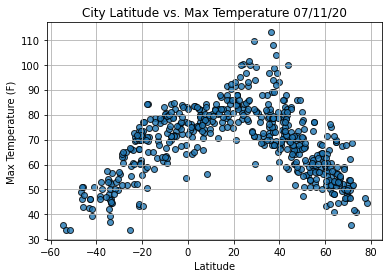

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

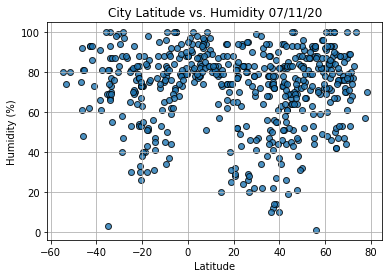

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

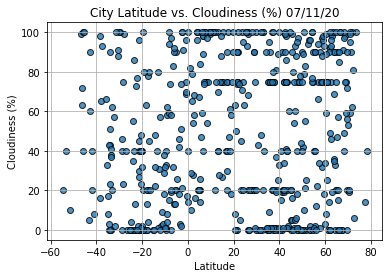

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

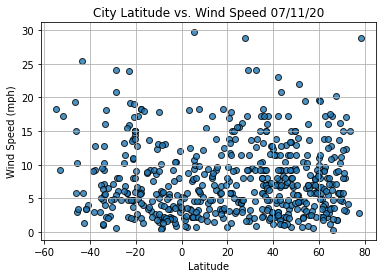

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                   Nanortalik
Country                        GL
Date          2020-07-11 22:58:05
Lat                         60.14
Lng                        -45.24
Max Temp                    43.29
Humidity                       91
Cloudiness                     59
Wind Speed                  10.02
Name: 13, dtype: object

In [23]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-07-11 22:58:03,-33.65,115.33,46.00,77,0,16.04
1,Hithadhoo,MV,2020-07-11 22:58:03,-0.60,73.08,83.17,79,17,12.10
2,Iqaluit,CA,2020-07-11 22:53:12,63.75,-68.51,41.00,93,90,2.24
3,Albany,US,2020-07-11 22:56:34,42.60,-73.97,82.99,74,99,7.78
4,New Norfolk,AU,2020-07-11 22:58:04,-42.78,147.06,46.00,93,60,1.25
5,Imbituba,BR,2020-07-11 22:58:04,-28.24,-48.67,60.80,100,75,8.05
6,Yellowknife,CA,2020-07-11 22:58:01,62.46,-114.35,75.00,46,75,13.87
7,Nouadhibou,MR,2020-07-11 22:58:04,20.93,-17.03,69.80,83,0,13.87
8,Rikitea,PF,2020-07-11 22:56:40,-23.12,-134.97,69.46,70,13,15.95
9,Nizhnedevitsk,RU,2020-07-11 22:58:05,51.54,38.37,60.80,67,0,4.47


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Iqaluit,CA,2020-07-11 22:53:12,63.75,-68.51,41.00,93,90,2.24
3,Albany,US,2020-07-11 22:56:34,42.60,-73.97,82.99,74,99,7.78
6,Yellowknife,CA,2020-07-11 22:58:01,62.46,-114.35,75.00,46,75,13.87
7,Nouadhibou,MR,2020-07-11 22:58:04,20.93,-17.03,69.80,83,0,13.87
9,Nizhnedevitsk,RU,2020-07-11 22:58:05,51.54,38.37,60.80,67,0,4.47
...,...,...,...,...,...,...,...,...,...
541,Rozzano,IT,2020-07-11 22:59:30,45.38,9.16,71.01,83,16,8.05
542,Rivers,CA,2020-07-11 22:59:31,50.03,-100.24,77.00,61,75,9.17
543,Gasa,PS,2020-07-11 22:59:31,31.50,34.47,77.00,72,0,1.99
545,Gazanjyk,TM,2020-07-11 22:59:31,39.24,55.52,81.07,44,25,7.23


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Iqaluit,CA,2020-07-11 22:53:12,63.75,-68.51,41.00,93,90,2.24
3,Albany,US,2020-07-11 22:56:34,42.60,-73.97,82.99,74,99,7.78
6,Yellowknife,CA,2020-07-11 22:58:01,62.46,-114.35,75.00,46,75,13.87
7,Nouadhibou,MR,2020-07-11 22:58:04,20.93,-17.03,69.80,83,0,13.87
9,Nizhnedevitsk,RU,2020-07-11 22:58:05,51.54,38.37,60.80,67,0,4.47


In [27]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2020-07-11 22:58:03,-33.65,115.33,46.00,77,0,16.04
1,Hithadhoo,MV,2020-07-11 22:58:03,-0.60,73.08,83.17,79,17,12.10
4,New Norfolk,AU,2020-07-11 22:58:04,-42.78,147.06,46.00,93,60,1.25
5,Imbituba,BR,2020-07-11 22:58:04,-28.24,-48.67,60.80,100,75,8.05
8,Rikitea,PF,2020-07-11 22:56:40,-23.12,-134.97,69.46,70,13,15.95


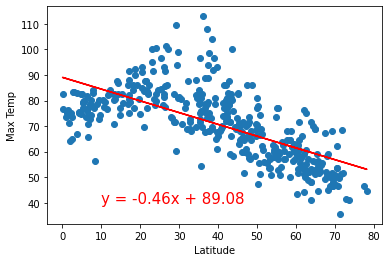

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

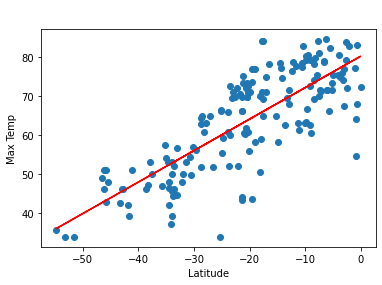

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

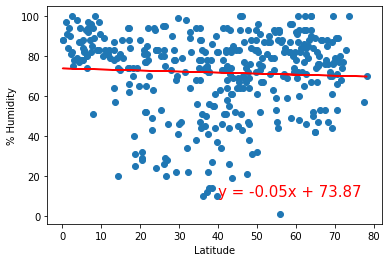

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

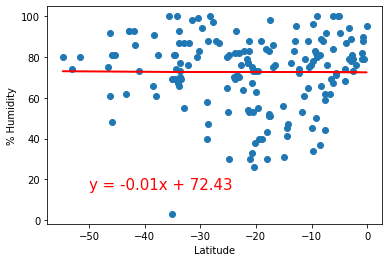

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

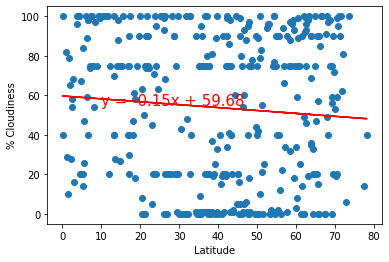

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(10,55))

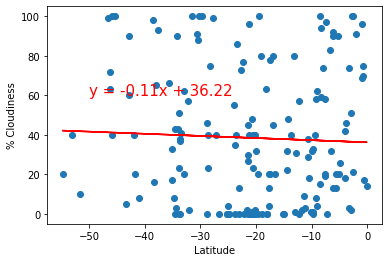

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

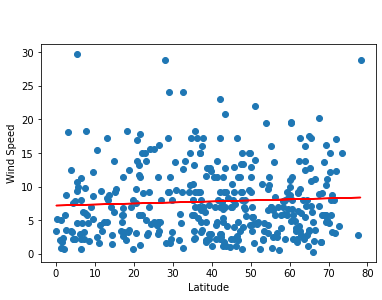

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

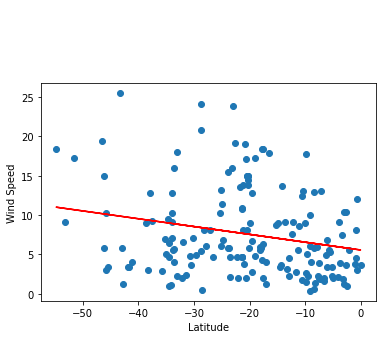

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))